# RNN: Tripadvisor


## Importing Necessary Libraries

In [1]:
# Importing Essential Libraries that is required for this project
import pandas as pd
import numpy as np
import re
import nltk
import keras
nltk.download('punkt')

import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Loading Dataset


In [2]:
# Connecting our colab file to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Providing the path to our dataset
df = "/content/drive/MyDrive/Level6/AI/NLP Datasets/tripadvisor_hotel_reviews.csv/tripadvisor_hotel_reviews.csv"

#Data Understanding

In [4]:
# Loading and reading the provided dataset
data = pd.read_csv(df)

In [5]:
#display first 10 of the dataset
data.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [6]:
data.info#Showing the info of dataset

<bound method DataFrame.info of                                                   Review  Rating
0      nice hotel expensive parking got good deal sta...       4
1      ok nothing special charge diamond member hilto...       2
2      nice rooms not 4* experience hotel monaco seat...       3
3      unique, great stay, wonderful time hotel monac...       5
4      great stay great stay, went seahawk game aweso...       5
...                                                  ...     ...
20486  best kept secret 3rd time staying charm, not 5...       5
20487  great location price view hotel great quick pl...       4
20488  ok just looks nice modern outside, desk staff ...       2
20489  hotel theft ruined vacation hotel opened sept ...       1
20490  people talking, ca n't believe excellent ratin...       2

[20491 rows x 2 columns]>

In [9]:
data.isnull().sum()# calculating, addingthe count of missing values from each column 

Review    0
Rating    0
dtype: int64

In [7]:
data.dropna()# Dropping any null values present

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [8]:
data.shape#cecking row and column of dataset

(20491, 2)

In [10]:
data.duplicated().any()#Dropping duplicated values if any

False

In [11]:
empty = []# Checking for any empty string
for i, Review, Rating in data.itertuples():
  if type(Review) == str:
    if Review.isspace():
      empty.append(i)

print(f"There are total {len(empty)} empty strings as review.")

There are total 0 empty strings as review.


In [12]:
data['Rating'].value_counts()#helps to counts and show unique value in rating column

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [14]:
data['Word_count']= data['Review'].map(lambda x: len(x.split()))
# adding new column and storing word count of each review column

In [15]:
data.head()#First 5 data of dataset

,Review,Rating,Word_count
0,nice hotel expensive parking got good deal sta...,4,87
1,ok nothing special charge diamond member hilto...,2,250
2,nice rooms not 4* experience hotel monaco seat...,3,217
3,"unique, great stay, wonderful time hotel monac...",5,89
4,"great stay great stay, went seahawk game aweso...",5,191


# Data Visualization

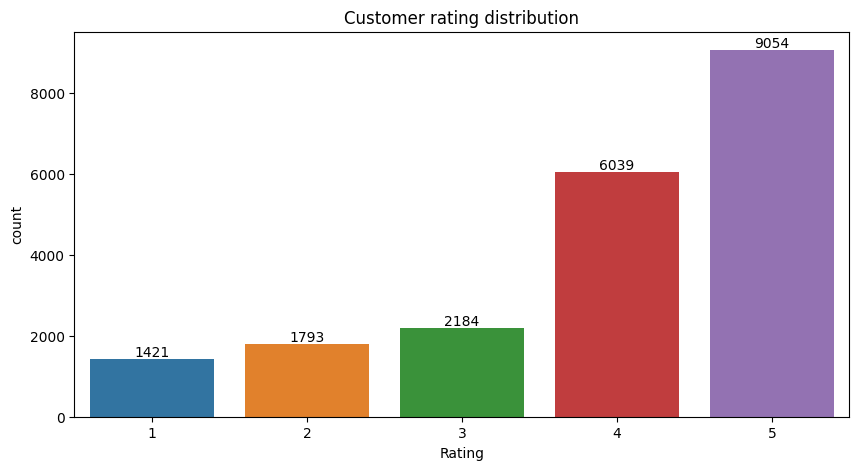

In [13]:
#visualizing the review rating distrubution (out of 5)
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=data, x='Rating')
ax.bar_label(ax.containers[0])
# Giving a title
ax.set_title('Customer rating distribution')

plt.show()

From the above visualization , we can see that in the dataset there are more number of positive reviews while comparing to the negative review count. Full-rating has the maximum number of counts and the lowest rating has the lowest count.

<Axes: xlabel='Rating', ylabel='Word_count'>

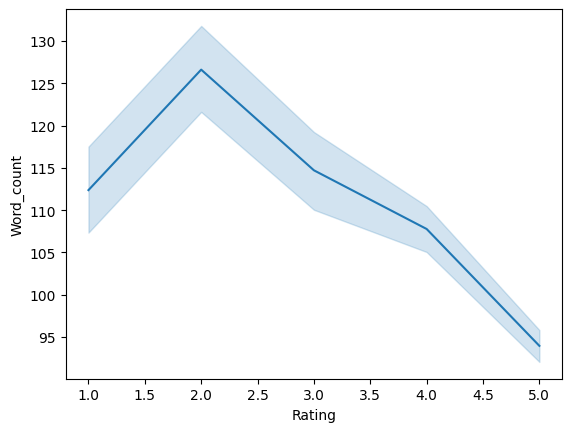

In [16]:
sns.lineplot(x='Rating', data=data, y='Word_count')#showing Rating to Word_count in lineplot

From the above visualization , we can derive the information that lower ratings have more word count while comparing to higher ratings. It can be seen that the rating from 2-3 contains the maximum number of word counts.

In [171]:
from textblob import TextBlob#importing TextBlob from textblob module to classify the text into polarity and subjectivity

In [18]:
#Sentiment polarity to check whether the text expresses positive, negative, or neutral sentiment
def polarity(text):
    blob= TextBlob(text)#creating TextBlob object for the input text 
    blob.sentiment
    polarity= blob.sentiment.polarity

    return polarity

In [19]:
def subjectivity(text):#to check which text expresses opinion, emotions or personal viewpoints
    blob= TextBlob(text)# Create a TextBlob object for the input text
    blob.sentiment
    subjectivity= blob.sentiment.subjectivity#geting subjectivity value from the sentiment analysis 

    return subjectivity

In [20]:
#Calculating Sentiment polarity and subjectivity through review  and storing it from 0 to 1
data['Polarity'] = data['Review'].apply(polarity)
data['Subjectivity'] = data['Review'].apply(subjectivity)
data

,Review,Rating,Word_count,Polarity,Subjectivity
0,nice hotel expensive parking got good deal sta...,4,87,0.208744,0.687000
1,ok nothing special charge diamond member hilto...,2,250,0.214923,0.495009
2,nice rooms not 4* experience hotel monaco seat...,3,217,0.294420,0.605208
3,"unique, great stay, wonderful time hotel monac...",5,89,0.504825,0.691228
4,"great stay great stay, went seahawk game aweso...",5,191,0.384615,0.629396
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,109,0.221729,0.508586
20487,great location price view hotel great quick pl...,4,39,0.503704,0.622222
20488,"ok just looks nice modern outside, desk staff ...",2,63,0.171220,0.524304
20489,hotel theft ruined vacation hotel opened sept ...,1,781,0.122573,0.533441


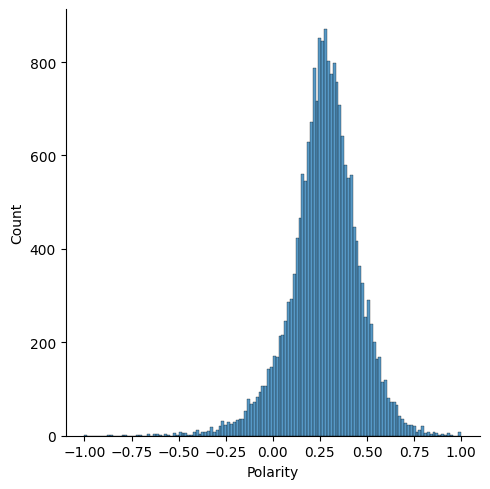

In [21]:
# Displaying the Polarity column using a displot
sns.displot(data['Polarity'])

<Axes: xlabel='Rating', ylabel='Polarity'>

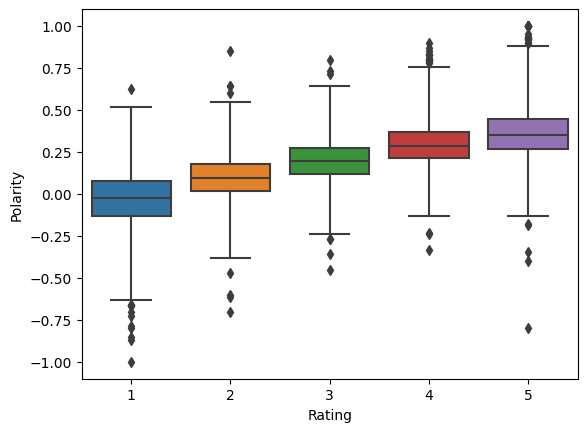

In [22]:
sns.boxplot(x='Rating',y='Polarity', data=data, whis=2.5, fliersize= 5)

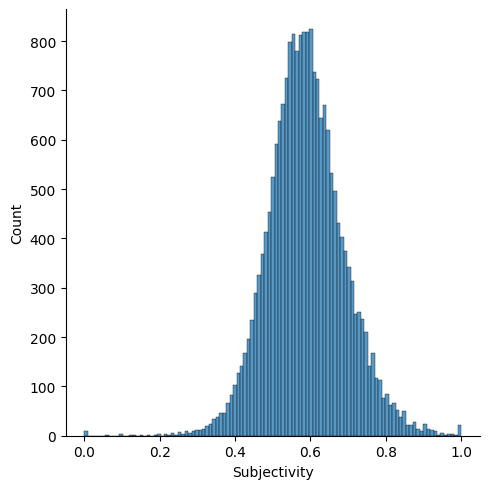

In [23]:
sns.displot(data['Subjectivity'])

<Axes: xlabel='Rating', ylabel='Subjectivity'>

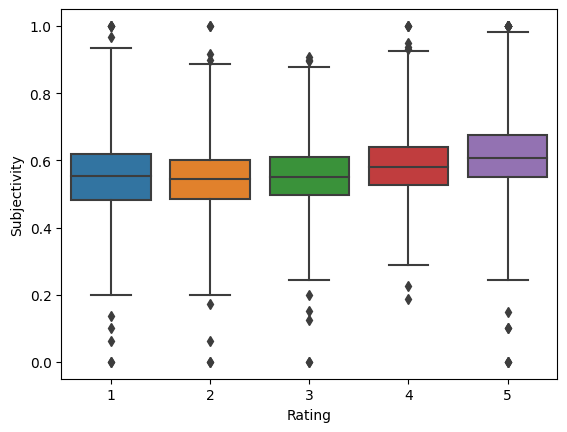

In [24]:
sns.boxplot(x='Rating',y='Subjectivity', data=data, whis=2.5, fliersize= 5)

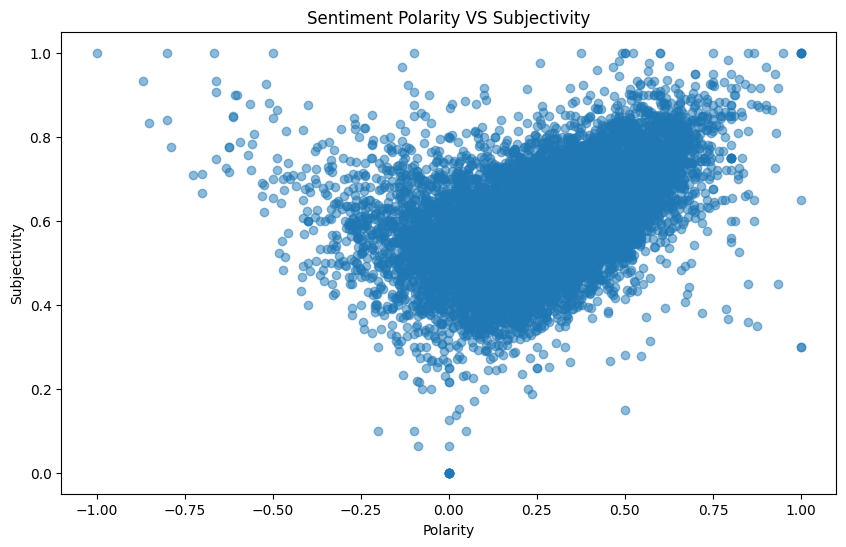

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(data['Polarity'], data['Subjectivity'],alpha=0.5)
plt.title('Sentiment Polarity VS Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [90]:
#Showing the highest occurrence words in the Review section. Analyzing the initial 2000 words.
rev= " ".join([review for review in data['Review']])
rev[:2000]

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews did valet parking check quick easy little disappointed nonexistent view room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe just noisy neighbors aveda bath products nice did not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience having pay 40 parking night ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle start booked suite paid extra website description not suite bedroom bathroom standard hotel room took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast got kidding embassy suits sitting room bathroom bedroom unlike kimpton calls suite 5 da

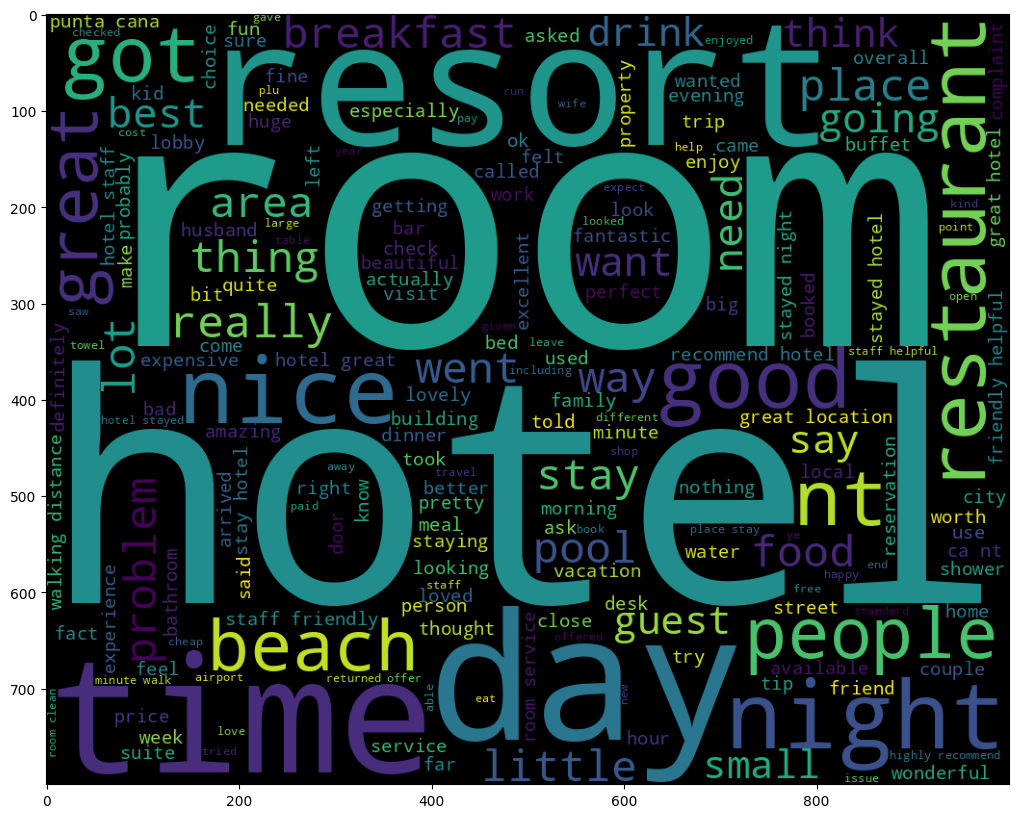

In [91]:
# Importing a Worldcloud library to display the repetitive words
from wordcloud import WordCloud
# Defining the figure size
plt.figure(figsize=(15,10))
# Generating the words stored in rev
wc= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(rev)
plt.imshow(wc)

# Data Cleaning

## Removing Unwanted Characters

In [26]:
def remove_emoji(string):
  """
  This function will replace the emoji in string with whitespace
  """
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"  #curly loop/ scissors
                           u"\U000024C2-\U0001F251"  #metro station/ accept symbols
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r' ', string)

In [27]:
# Testing the built function
teststring ="Hello @Group 11 😁. This ^&*!@ is a te@t sentence"
test =remove_emoji(teststring)
test


'Hello @Group 11  . This ^&*!@ is a te@t sentence'

In [28]:
#Applying this function in out dataset
data['Review'] = data['Review'].apply(remove_emoji)

## Removing Unwanted Text

In [29]:
def remove_unwanted_text(text):
  # remove hashtags
  cleaned_text = re.sub("#[A-Za-z0-9_]+"," ", text)
  # remove punctuation
  cleaned_text = re.sub("[^0-9A-Za-z ]", " " , text)
  #Remove characters
  cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
  #remove emojis
  cleaned_text = remove_emoji(cleaned_text)
  # remove double spaces
  cleaned_text = cleaned_text.replace('  ',"")
  #Remove repetitive words
  words = cleaned_text.split()
  cleaned_words = [words[i] for i in range(len(words)) if i == 0 or words[i] != words[i-1]]
  cleaned_text = ' '.join(cleaned_words)

  return cleaned_text

In [30]:
#Testing build function to verify it working
unwanted_text = "hello hello hello hi hi @1212512(*&(*^&!&@#!) )"
test = remove_unwanted_text(unwanted_text)
test

'hello hi 1212512'

In [31]:
#Applying this function in out dataset
data['Review'] = data['Review'].apply(remove_unwanted_text)

## Removing URLs

In [32]:
#Importing Regular Expressions (regex) for pattern matching
def remove_urls(text):
  """
  This function will try to remove URL present in out dataset and replace it with space using regex library.
  Input Args:
  text: strings of text that may contain URLs.
  Output Args:
  text: URLs replaces with text
  """
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)


In [33]:
#Testing the build function
unwanted_url = "https://colab.research.google.com/drive/1WSNGsf2sTf8NgxqdgdRJSuamysXmr-zt#scrollTo=1Vzba5bW6XvI"
test = remove_urls(unwanted_url)
test

''

In [34]:
#Applying same function of review
data['Review'] = data['Review'].apply(remove_urls)

# Text Preprocessing

In [35]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download the necessary resources if you haven't already
nltk.download('stopwords')
nltk.download('wordnet')

# List of stopwords
stop_words = set(stopwords.words('english'))

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to remove stop words and lemmatize text
def preprocess_text(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return ' '.join(lemmatized_words)

# Apply preprocessing to the 'Reviews' column
data['Processed_Reviews'] = data['Review'].apply(preprocess_text)

# Display the updated DataFrame
print(data.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                              Review  Rating  Word_count  \
0  nice hotel expensive parking got good deal sta...       4          87   
1  ok nothing special charge diamond member hilto...       2         250   
2  nice rooms not 4 experience hotel monaco seatt...       3         217   
3  unique great stay wonderful time hotel monaco ...       5          89   
4  great stay great stay went seahawk game awesom...       5         191   

   Polarity  Subjectivity                                  Processed_Reviews  
0  0.208744      0.687000  nice hotel expensive parking got good deal sta...  
1  0.214923      0.495009  ok nothing special charge diamond member hilto...  
2  0.294420      0.605208  nice room 4 experience hotel monaco seattle go...  
3  0.504825      0.691228  unique great stay wonderful time hotel monaco ...  
4  0.384615      0.629396  great stay great stay went seahawk game awesom...  


In [39]:
from nltk.stem import PorterStemmer
from tqdm import tqdm

stemmer = PorterStemmer()

# Iterate through each review in the 'Processed_Reviews' column and update it
for i in tqdm(range(len(data))):
    review = data['Processed_Reviews'][i]
    stemmed_review = ' '.join([stemmer.stem(word) for word in review.split()])
    data['Processed_Reviews'][i] = stemmed_review

  0%|          | 0/20491 [00:00<?, ?it/s]<ipython-input-39-21539a1f8a60>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Processed_Reviews'][i] = stemmed_review
100%|██████████| 20491/20491 [01:09<00:00, 295.35it/s]


In [44]:
# Applying tokenizer to the train texts
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Processed_Reviews'])


In [45]:
# Let's see total number of unique words present in all the reveiws combined
vocab_size = len(tokenizer.word_index)

# tokeninzer.index_word is a dictonary which can be user to view all the unique words and there ID's.

print(f'There are total {vocab_size} unique words present')

There are total 66634 unique words present


In [47]:
# Now let's replace each word in review with there respective token id
sequences = tokenizer.texts_to_sequences(data['Processed_Reviews'])

In [48]:
indexing = tokenizer.word_index
indexing

{'hotel': 1,
 'room': 2,
 'stay': 3,
 'great': 4,
 'nt': 5,
 'good': 6,
 'staff': 7,
 'night': 8,
 'locat': 9,
 'nice': 10,
 'day': 11,
 'time': 12,
 'clean': 13,
 'servic': 14,
 'walk': 15,
 'restaur': 16,
 'beach': 17,
 'place': 18,
 'breakfast': 19,
 'like': 20,
 'food': 21,
 'resort': 22,
 'pool': 23,
 'help': 24,
 'bed': 25,
 'realli': 26,
 'love': 27,
 'area': 28,
 'peopl': 29,
 'friendli': 30,
 'want': 31,
 'excel': 32,
 'book': 33,
 'small': 34,
 'recommend': 35,
 'bar': 36,
 'littl': 37,
 'got': 38,
 'view': 39,
 'look': 40,
 'bathroom': 41,
 '2': 42,
 'best': 43,
 'make': 44,
 'minut': 45,
 'price': 46,
 'trip': 47,
 'use': 48,
 'review': 49,
 'floor': 50,
 'beauti': 51,
 'need': 52,
 'water': 53,
 'lot': 54,
 'comfort': 55,
 'check': 56,
 'arriv': 57,
 'enjoy': 58,
 'ask': 59,
 'went': 60,
 'thing': 61,
 'drink': 62,
 'return': 63,
 'tri': 64,
 'wonder': 65,
 'desk': 66,
 'problem': 67,
 '5': 68,
 '3': 69,
 'travel': 70,
 'say': 71,
 'right': 72,
 'way': 73,
 'work': 74,
 'c

In [49]:
max_len = 100#setting the max length of sequence

In [50]:
# Now to create a RNN-NLP model,each input should be equal in length
# we can acheciving by padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# We will keep the length of inputs to be 100.So if any input have length less then 100,extra 0s will be added
# Any input with length more then 100 will have the extra word removed.
sequences_padded = pad_sequences(sequences,maxlen=max_len,padding='post')

In [51]:
sequences_padded # input data

array([[   10,     1,   184, ...,     0,     0,     0],
       [ 1316,   118, 23429, ...,   806,     1,   554],
       [  738,    10,  2743, ...,    53,  1568,    85],
       ...,
       [  156,    40,    10, ...,     0,     0,     0],
       [  287,  2247, 66630, ...,   325,  2789,  2198],
       [   29,   473,   204, ...,     0,     0,     0]], dtype=int32)

In [52]:
# Now our input variable is in correct format to create and train our model
# Let's check the output variable

y = data['Rating'].apply(lambda x :1 if x > 4 else 0).values

## Build Model

## Split Data

In [53]:
# Our input and out put varibales are ready.Let's split the data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, y, test_size = 0.2, random_state = 42)

In [56]:
# Libraries to create and train our model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          6663500   
                                                                 
 lstm_6 (LSTM)               (None, 256)               365568    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 7,072,333
Trainable params: 7,072,333
No

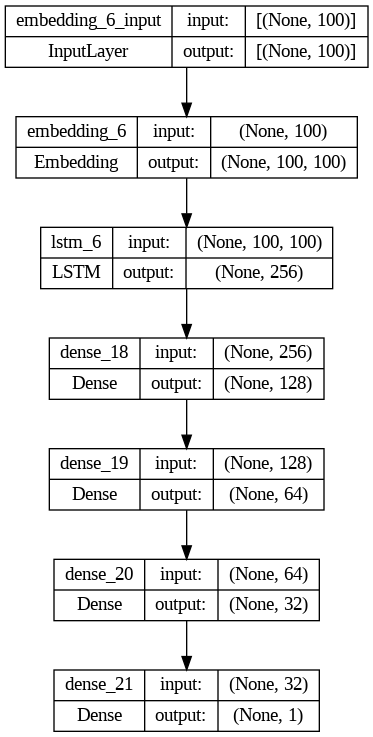

In [77]:
# Model
embedding_size = 100
# vocab_size = len(indexing) + 1
model = Sequential()#creating sequetial model

model.add(Embedding(vocab_size+1,embedding_size,input_length = max_len))#This line is adding an embedding layer to the model

model.add(LSTM(256,dropout = 0.5,recurrent_dropout = 0.5))#adding LSTM with 128 layers unit
model.add(Dense(128,activation='relu'))#adding another dense layer 128 units with activation relu
model.add(Dense(64,activation='relu'))#adding another dense layer 64 units with activation relu
model.add(Dense(32,activation='relu'))#adding another dense layer 32 units with activation relu
model.add(Dense(1,activation='sigmoid'))#adding output layer with sigmoid function

# compiling the model with learning rate
initial_learning_rate = 0.001#initializing learning rate 
optimizer = Adam(learning_rate = initial_learning_rate)#adam optimizer is created with learning rate 0.001
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])# model has been compile with adam pptimizer and loss function

# defining a learning rate scheduler
def learning_rate_schedule(epoch , lr):
    if epoch < 10:# Keep the learning rate unchanged for the first 10 epochs
        return lr
    else: # After 10 epochs, decrease the learning rate by a factor of 0.1
        return lr * 0.1

lr_scheduler = LearningRateScheduler(learning_rate_schedule)
model.summary()

# Plotting the model
from keras.utils.vis_utils import plot_model

plot_model(model , to_file='lstm_model.png' , show_shapes = True , show_layer_names = True)

## Model Training

In [78]:
from keras.callbacks import EarlyStopping#importing Earlystopping from keras libraries
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [79]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64 , callbacks=[early_stopping,lr_scheduler])
model.save("/content/drive/MyDrive/Level6/AI/NLP Datasets/tripadvisor_hotel_reviews.csv/model_trained.h5")
#Fit the model with  training  and validation data

Epoch 1/10
257/257 [==============================] - 359s 1s/step - loss: 0.6740 - accuracy: 0.5601 - val_loss: 0.6765 - val_accuracy: 0.5877 - lr: 0.0010
Epoch 2/10
257/257 [==============================] - 352s 1s/step - loss: 0.6079 - accuracy: 0.6842 - val_loss: 0.6166 - val_accuracy: 0.6341 - lr: 0.0010
Epoch 3/10
257/257 [==============================] - 349s 1s/step - loss: 0.5725 - accuracy: 0.7106 - val_loss: 0.5634 - val_accuracy: 0.7353 - lr: 0.0010
Epoch 4/10
257/257 [==============================] - 352s 1s/step - loss: 0.5074 - accuracy: 0.7594 - val_loss: 0.6179 - val_accuracy: 0.7409 - lr: 0.0010
Epoch 5/10
257/257 [==============================] - 353s 1s/step - loss: 0.4504 - accuracy: 0.8044 - val_loss: 0.5871 - val_accuracy: 0.7363 - lr: 0.0010
Epoch 6/10
257/257 [==============================] - 346s 1s/step - loss: 0.3892 - accuracy: 0.8300 - val_loss: 0.6324 - val_accuracy: 0.7170 - lr: 0.0010
Epoch 7/10
257/257 [==============================] - 344s 1s/st

In [80]:
metrics = pd.DataFrame(model.history.history)#dataframe has been created from data train history
metrics.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,0.674047,0.560090,0.676457,0.587704,0.001
1,0.607921,0.684236,0.616556,0.634057,0.001
2,0.572519,0.710591,0.563425,0.735301,0.001
3,0.507438,0.759395,0.617942,0.740912,0.001
4,0.450375,0.804417,0.587117,0.736277,0.001


In [81]:
accuracy = metrics['accuracy']#training Accuracy
val_accuracy = metrics['val_accuracy']#Validation accuracy
val_loss = metrics['val_loss']#Validation Loss
loss = metrics['loss']# training Loss
print("Accuracy" , accuracy)#printing above variables
print("Validation Accuracy" , val_accuracy)
print("Loss",loss)
print("Validation Loss",val_loss)

Accuracy 0    0.560090
1    0.684236
2    0.710591
3    0.759395
4    0.804417
5    0.829978
6    0.848768
7    0.894461
8    0.923499
9    0.942289
Name: accuracy, dtype: float64
Validation Accuracy 0    0.587704
1    0.634057
2    0.735301
3    0.740912
4    0.736277
5    0.717004
6    0.741644
7    0.744816
8    0.736521
9    0.736521
Name: val_accuracy, dtype: float64
Loss 0    0.674047
1    0.607921
2    0.572519
3    0.507438
4    0.450375
5    0.389168
6    0.339312
7    0.256320
8    0.193574
9    0.148525
Name: loss, dtype: float64
Validation Loss 0    0.676457
1    0.616556
2    0.563425
3    0.617942
4    0.587117
5    0.632397
6    0.612433
7    0.607615
8    0.758791
9    0.893443
Name: val_loss, dtype: float64


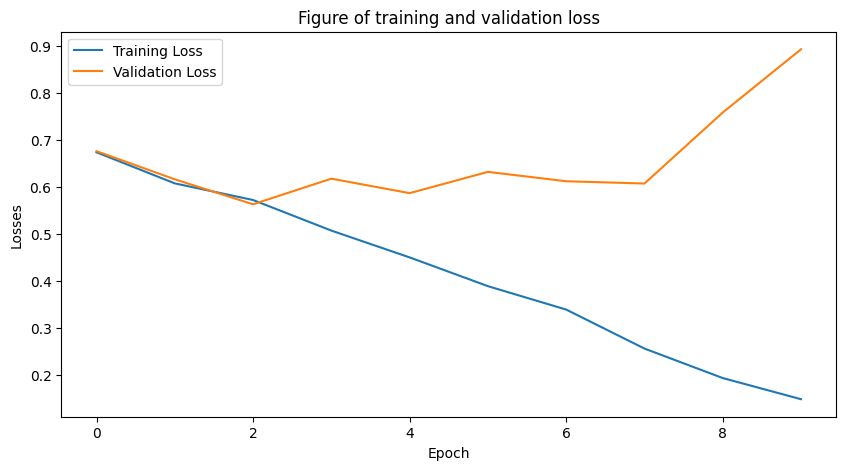

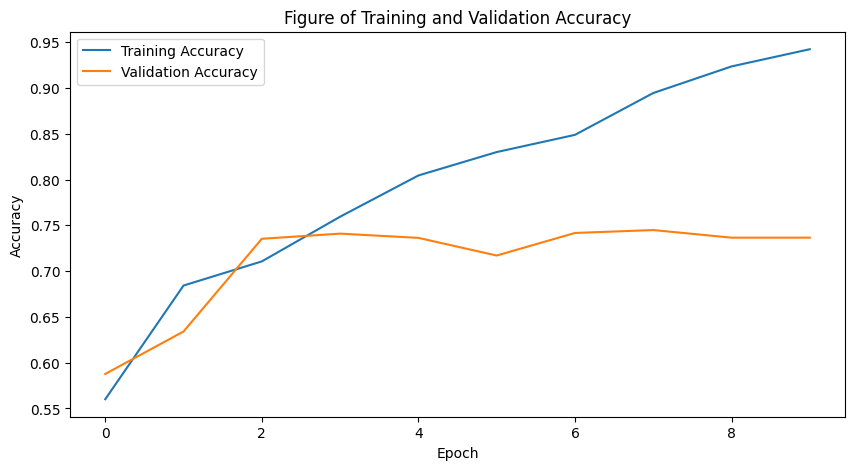

In [82]:
from nltk.downloader import Label
# Plotting the values
plt.figure(figsize=(10,5))
plt.plot(loss , label="Training Loss")
plt.plot(val_loss , label="Validation Loss")
plt.title("Figure of training and validation loss")
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend()
plt.show()


plt.figure(figsize=(10,5))
plt.plot(accuracy , label="Training Accuracy")
plt.plot(val_accuracy , label="Validation Accuracy")
plt.title("Figure of Training and Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model Evaluation


In [169]:
# Importing necessary library to load the model
from tensorflow.keras.models import load_model

In [161]:
from sklearn.metrics import accuracy_score
# Loading the model

model_load = load_model("/content/drive/MyDrive/Level6/AI/NLP Datasets/tripadvisor_hotel_reviews.csv/model_trained.h5")

# Evaluate the model on validation data
loss, val_accuracy = model_load.evaluate(X_test, y_test)

print("Validation Loss:", loss)
print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))

# Make predictions and calculate accuracy manually
y_pred = model.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = {:.2f}%".format(accuracy * 100))

129/129 [==============================] - 24s 176ms/step - loss: 0.8934 - accuracy: 0.7365
Validation Loss: 0.8934427499771118
Validation Accuracy: 73.65%
129/129 [==============================] - 21s 165ms/step
Accuracy = 73.65%


# AUC-ROC Curve

In [162]:
from sklearn.metrics import roc_curve
y_pred_prob = model_load.predict(X_test)
fpr , tpr , thresholds = roc_curve(y_test , y_pred_prob)#calculating roc curve

129/129 [==============================] - 21s 163ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

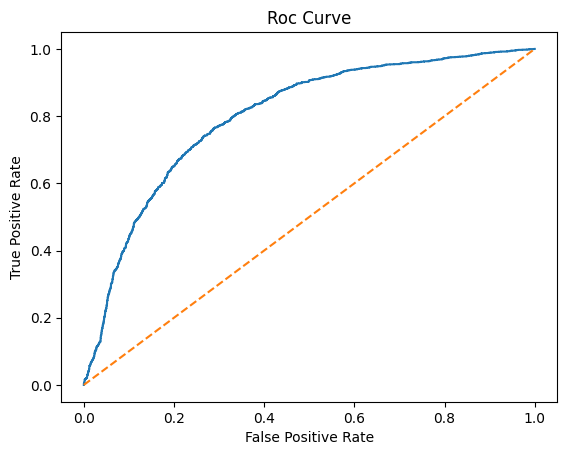

In [163]:
plt.plot(fpr,tpr)
plt.plot([0,1] , [0,1] , linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Roc Curve')
plt.show

In [164]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(y_test , y_pred_prob)
print("AUC Score:" , score)

AUC Score: 0.7993450452564775


# Confusion Matrix

In [165]:
from sklearn.metrics import confusion_matrix#used to compute the confusion matrix for evaluating the performance of a classification model


In [166]:
matrix = confusion_matrix(y_test , y_pred)# calculating confusion matrix with test and train data

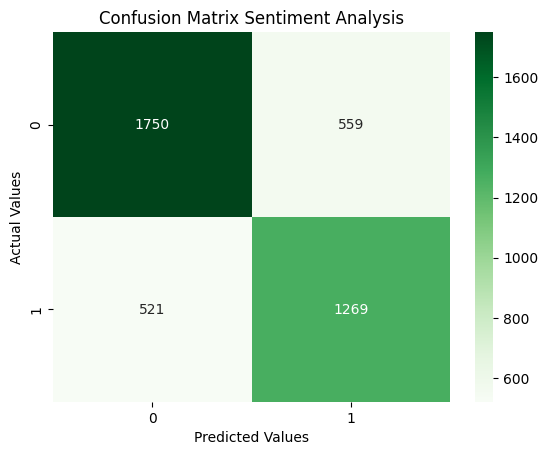

In [167]:
sns.heatmap(matrix , annot =True , fmt = "d" , cmap = "Greens")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix Sentiment Analysis")
plt.show()

# Testing our trained model


---



In [170]:
# Running the tokenizer function and fitting the tokenizer into the data column
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Processed_Reviews'])


# Creating a list of objects to feed into the trained model
input_texts = [
    "nice hotel not nice staff",
    "ok nothing special",
    "good hotel good environment"
]

#Tokenzing and padding the input object for processing
input_tokenized = tokenizer.texts_to_sequences(input_texts)
input_padded = pad_sequences(input_tokenized, maxlen=max_len, padding='post')

# Predicting the sentiments using the fed input
input_predict = model_load.predict(input_padded)

#Setting up a custom threshold
threshold = 0.5

# Converting probabilities to binary values
input_predict_binary = (input_predict > 1-threshold).astype('int32')

#Finally, displaying the sentiment prediction value
for i in range(len(input_texts)):
    print("Input Text:", input_texts[i])
    # applying conditionals to print sentiment prediction values
    print("Binary Prediction:", "Positive" if input_predict_binary[i][0] == 1 else "Negative")
    print()



1/1 [==============================] - 0s 70ms/step
Input Text: nice hotel not nice staff
Binary Prediction: Positive

Input Text: ok nothing special
Binary Prediction: Negative

Input Text: good hotel good environment
Binary Prediction: Positive

